In [1]:
import datasets as ds
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
import os
import numpy as np
import nltk
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
nltk.download('wordnet')
nltk.download('omw-1.4')
from yellowbrick.model_selection import FeatureImportances
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.utils import *
import joblib

/opt/conda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
CUR_DIR = os.path.abspath(os.curdir)
ROOT_DIR = os.path.dirname(CUR_DIR)
IMAGES_DIR = os.path.join(ROOT_DIR, "images")
DATA_DIR = os.path.join(ROOT_DIR, "data")
MODELS_DIR = os.path.join(ROOT_DIR, "models")
MODELS_DIR

'/home/jovyan/projects/vector-nlp/models'

In [3]:
validation_df = pd.read_csv(os.path.join(DATA_DIR,'raw','validation.csv'))
training_df = pd.read_csv(os.path.join(DATA_DIR,'raw','training.csv'))
test_df = pd.read_csv(os.path.join(DATA_DIR,'raw','test.csv'))


In [4]:
X_train = training_df['review']
y_train = training_df['star']

X_val = validation_df['review']
y_val = validation_df['star']

X_test = test_df['review']
y_test = test_df['star']


vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
X_train_tfidf = vect.fit_transform(X_train)
X_test_tfidf = vect.transform(X_test)
X_val_tfidf = vect.transform(X_val)

In [5]:
features = vect.vocabulary_.keys()
booster = XGBRegressor_v2(max_depth=15,n_estimators=120,name='2.5-XGBOOST-Tfidf')


eval_set = [(X_test_tfidf, y_test)]
# booster.fit(X_train,y_train,eval_metric="mae", eval_set=eval_set, verbose=True)
booster.fit(X_train_tfidf,y_train,eval_metric="mae", eval_set=eval_set, verbose=True)

[22:13:25] WARNING: ../src/learner.cc:576: 
Parameters: { "name" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mae:2.57221
[1]	validation_0-mae:2.01110
[2]	validation_0-mae:1.63769
[3]	validation_0-mae:1.40336
[4]	validation_0-mae:1.24360
[5]	validation_0-mae:1.14106
[6]	validation_0-mae:1.07455
[7]	validation_0-mae:1.02892
[8]	validation_0-mae:0.99454
[9]	validation_0-mae:0.96916
[10]	validation_0-mae:0.95113
[11]	validation_0-mae:0.93615
[12]	validation_0-mae:0.92465
[13]	validation_0-mae:0.91542
[14]	validation_0-mae:0.90837
[15]	validation_0-mae:0.90250
[16]	validation_0-mae:0.89774
[17]	validation_0-mae:0.89283
[18]	validation_0-mae:0.88960
[19]	validation_0-mae:0.88550
[20]	validation_0-mae:0.88278
[21]	validation_0-mae:0.8

XGBRegressor_v2(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1,
                enable_categorical=False, gamma=0, gpu_id=-1,
                importance_type=None, interaction_constraints='',
                learning_rate=0.300000012, max_delta_step=0, max_depth=15,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=120, n_jobs=8, name='2.5-XGBOOST-Tfidf',
                num_parallel_tree=1, objective='reg:squarederror',
                predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
                scale_pos_weight=1, subsample=1, tree_method='exact',
                validate_parameters=1, verbosity=None)

The prediction values range between 1.0 and 5.0
Mean Absolute Error: 0.7632652352767605


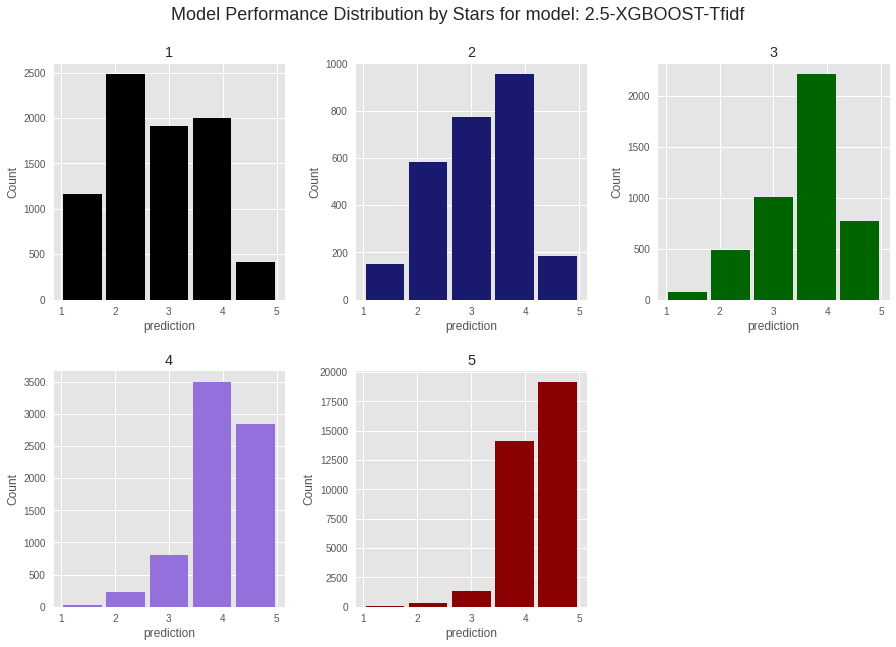

/home/jovyan/projects/vector-nlp/src/utils.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_df[bin_field_name] = pd.cut(eval_df[field], bins=bins, labels=labels)
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


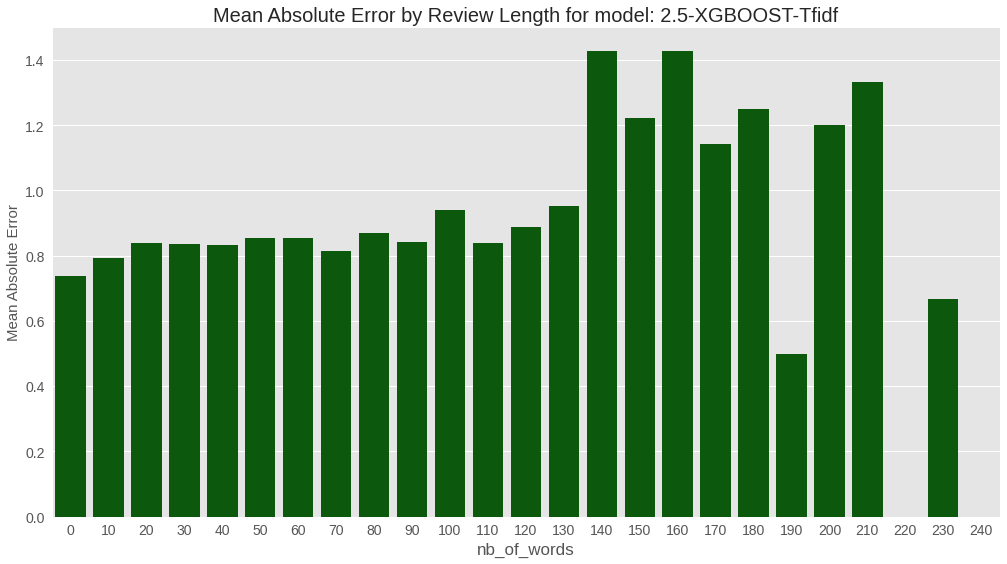

Performance appended successfully.
              precision    recall  f1-score   support

           1       0.79      0.15      0.25      7964
           2       0.14      0.22      0.17      2640
           3       0.17      0.22      0.19      4548
           4       0.15      0.47      0.23      7414
           5       0.82      0.55      0.66     35047

    accuracy                           0.44     57613
   macro avg       0.42      0.32      0.30     57613
weighted avg       0.65      0.44      0.49     57613

"I like the top but it took long to deliver" receives a score of [3.2021677]
"This app is trash" receives a score of [1.9304361]
"The app is extremely slow, but I still like it" receives a score of [3.0902226]
"I Do not Love this App" receives a score of [4.8538284]
"Too many glitches" receives a score of [3.5634413]
"Worthless app" receives a score of [2.0411072]
"Do not download this app" receives a score of [3.2983937]
"Horrible" receives a score of [1.8626033]
"Could 

In [6]:
performance_evaluation(X_test, y_test, booster, vect)

In [7]:
importances = booster.feature_importances_
df = pd.DataFrame({'features':features, 'importance':importances})
df.sort_values('importance',ascending = False).head(20)

,features,importance
20371,scarcity,0.007508
14047,adw,0.005447
17097,ashraf,0.005105
19972,lawyer,0.005050
8419,alpesh,0.004410
19179,werk,0.004234
17655,christopher,0.004132
18780,obb,0.003910
20438,okkkkkkk,0.003844
19396,canceling,0.003838


In [8]:

#save model
joblib.dump(booster, os.path.join(MODELS_DIR,booster.name)) 
# model.save(os.path.join(MODELS_DIR,'2.1-LSTM_TFIDF'))

['/home/jovyan/projects/vector-nlp/models/2.5-XGBOOST-Tfidf']